In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## The Regression Equation ##

The equation of the regression line for predicting $Y$ based on $X$ can be written in several equivalent ways. The regression equation, and the error in the regression estimate, are best understood in standard units. All the other representations follow by straightforward algebra.

Let $X$ and $Y$ be bivariate normal with parameters $(\mu_X, \mu_Y, \sigma_X^2, \sigma_Y^2, \rho)$. Then, as we have seen, the best predictor $E(Y \mid X)$ is a linear function of $X$ and hence the formula for $E(Y \mid X)$ is also the equation of the regression line.

### In Standard Units ###
Let $X_{su}$ be $X$ in standard units and $Y_{su}$ be $Y$ in standard units. The regression equation is

$$
E(Y_{su} \mid X_{su}) ~ = ~ \rho X_{su}
$$

and the amount of error in the prediction is measured by

$$
SD(Y_{su} \mid X_{su}) ~ = ~ \sqrt{1 - \rho^2}
$$

The conditional SD is in the same units as the prediction. The conditional variance is

$$
Var(Y_{su} \mid X_{su}) ~ = ~ 1 - \rho^2
$$

We know more than just the conditional expectation and conditional variance. We know that the conditional distribution of $Y_{su}$ given $X_{su}$ is normal. This allows us to find conditional probabilities given $X_{su}$, by the usual normal curve methods. For example, 

$$
P(Y_{su} < y_{su} \mid X_{su} = x_{su}) ~ = ~ \Phi \big{(} \frac{y_{su} - \rho x_{su}}{\sqrt{1-\rho^2}} \big{)}
$$

In one of Galton's famous data sets, the distribution of the heights of father-son pairs was roughly bivariate normal with a correlation of 0.5. Of the fathers whose heights were two SDs above average, about what percent had sons whose heights were more than 2 SDs above average?

By the regression effect, you know this answer has to be less than 50%. If $Y_{su}$ denotes the height of a randomly picked son in standard units, and $X_{su}$ the height of his father in standard units, then the proportion is approximately

$$
P(Y_{su} > 2 \mid X_{su} = 2) ~ = ~ 1 - \Phi \big{(} \frac{2 - 0.5\times2}{\sqrt{1-0.5^2}} \big{)}
$$

which is approximately 12.4%.

In [2]:
1 - stats.norm.cdf(2, 0.5*2, np.sqrt(1-0.5**2))

0.12410653949496186

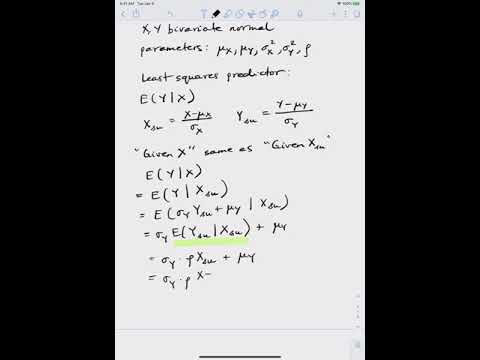

In [3]:
# VIDEO: Regression Equation
from IPython.display import YouTubeVideo

YouTubeVideo('hlAaKwSAXp8')

### In the Original Units ###
Usually, you want to make predictions in the units in which the data were measured. Before changing units in the formulas above, keep in mind that conditioning on $X$ is equivalent to conditioning on $X_{su}$. If you know the value of either of $X$ or $X_{su}$, you also know the other.

The regression equation is

$$
\begin{align*}
E(Y \mid X) ~ &= ~ E(Y \mid X_{su}) \\
&= ~ E(\sigma_Y Y_{su} + \mu_Y \mid X_{su}) \\
&= ~ \sigma_Y E(Y_{su} \mid X_{su}) + \mu_Y \\
&= ~ \sigma_Y \rho \big{(} \frac{X - \mu_X}{\sigma_X} \big{)} + \mu_Y \\
&= ~ \rho \frac{\sigma_Y}{\sigma_X} X + \big{(} \mu_Y - \rho\frac{\sigma_Y}{\sigma_X}\mu_X \big{)}
\end{align*}
$$

which is the same as the equation of the least squares line we had derived earlier without any assumptions about the joint distribution of $X$ and $Y$. This confirms our observation that if $X$ and $Y$ are bivariate normal, the best linear predictor is the best among all predictors.

The amount of error in the prediction is measured by $SD(Y \mid X)$ which is the same as

$$
SD(Y \mid X_{su}) ~ = ~ SD(\sigma_Y Y_{su} + \mu_Y \mid X_{su}) ~ = ~ 
\sigma_Y SD(Y_{su} \mid X_{su}) ~ = ~ \sqrt{1-\rho^2}\sigma_Y
$$

and

$$
Var(Y \mid X) = (1 - \rho^2)\sigma_Y^2
$$

The conditional distribution of $Y$ given $X$ is normal with the mean and variance calculated above.

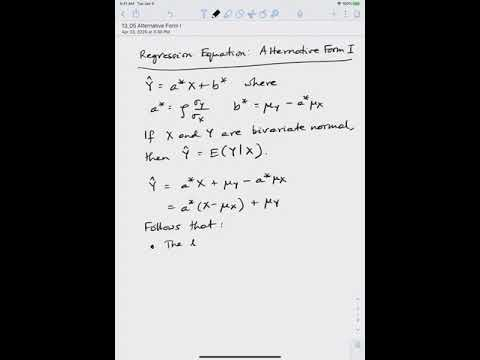

In [4]:
# VIDEO: Alternative Form I
YouTubeVideo('SCY7fbSHnX8')

### Regression Equation: Alternative Form I ###

Regardless of the joint distribution of $X$ and $Y$, the regression equation is 

$$
\hat{Y} ~ = ~ a^*X + b^* ~~~ \text{where } a^* = \rho \frac{\sigma_Y}{\sigma_X} \text{ and } b^* = \mu_Y - a^*\mu_X
$$

This is equivalent to

$$
\hat{Y} ~ = ~ a^*(X - \mu_X) + \mu_Y
$$

This form shows that the regression line passes through the point $(\mu_X, \mu_Y)$ and that $E(\hat{Y}) = \mu_Y$. The predicted values and the actual values are the same *on average*.

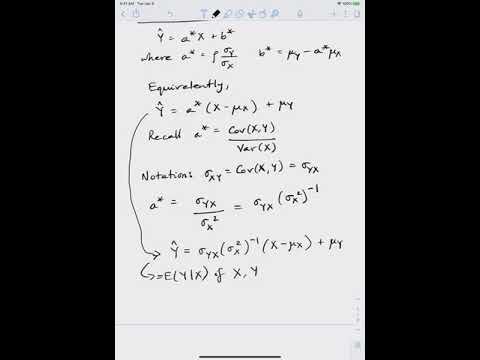

In [5]:
# VIDEO: Alternative Form II
YouTubeVideo('2kll2o4BZjI')

### Regression Equation: Alternative Form II ###
When there are just two variables, matrix formulations are hardly necessary. But it is worth writing the regression estimate and the conditional variance using only the mean vector and covariance matrix, and replacing division with multipliciation by an inverse. This effort will be rewarded in the next chapter because exactly analogous formulas will work for multiple regression. 

Define $\sigma_{X,Y} = Cov(X, Y) = \sigma_{Y,X}$. Then $X$ and $Y$ have mean vector $[\mu_X, ~ \mu_Y]^T$ and covariance matrix

$$
\begin{bmatrix}
\sigma_X^2 & \sigma_{Y,X} \\
\sigma_{X,Y} & \sigma_Y^2
\end{bmatrix}
$$

We know that

$$
\rho ~ = ~ \frac{\sigma_{X,Y}}{\sigma_X \sigma_Y}
$$

The regression equation can therefore be written as

$$
\begin{align*}
E(Y \mid X) ~ &= ~ \sigma_Y \rho \big{(} \frac{X - \mu_X}{\sigma_X} \big{)} + \mu_Y \\
&= ~ \frac{\sigma_{X,Y}}{\sigma_X^2}(X - \mu_X) + \mu_Y \\
&= ~ \sigma_{Y,X}(\sigma_X^2)^{-1} (X - \mu_X) + \mu_Y
\end{align*}
$$

Also

$$
\rho^2 ~ = ~ \frac{\sigma_{X,Y}^2}{\sigma_X^2 \sigma_Y^2}
$$

so the variance of the error is

$$
Var(Y \mid X) ~ = ~ (1 - \rho^2)\sigma_Y^2 ~ = ~ \sigma_Y^2 - \sigma_{X,Y}^2 (\sigma_X^2)^{-1} ~ = ~ \sigma_Y^2 - \sigma_{Y,X} (\sigma_X^2)^{-1} \sigma_{X,Y}
$$